<a href="https://colab.research.google.com/github/auliaacahyaa/Machine-Learning/blob/main/Kuis_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

no 1

Label  Jumlah Data
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958
Apakah terdapat data imbalance?
Ya


<ipython-input-4-20bc99dd1e6e>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts.iteritems():


([<matplotlib.axis.XTick at 0x7b193973a7a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

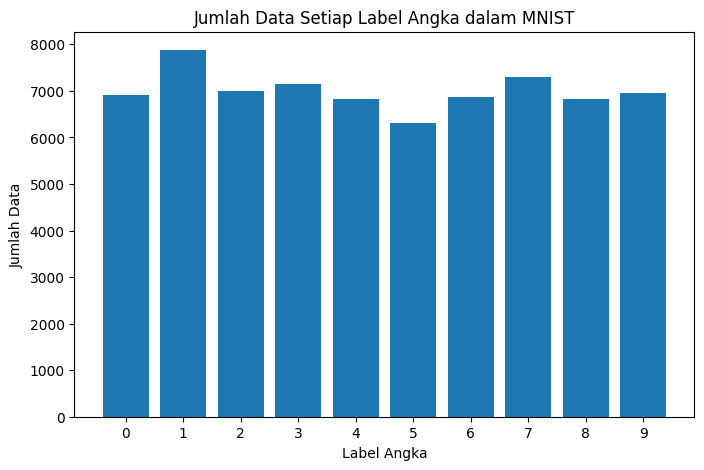

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd

# Mengonversi data MNIST ke dalam bentuk DataFrame
df = pd.DataFrame(data=mnist.data, columns=[f'pixel_{i}' for i in range(784)])
df['target'] = mnist.target.astype(int) # Menambahkan kolom target sebagai label

# Hitung jumlah data setiap label
label_counts = df['target'].value_counts().sort_index()

# Tampilkan hasil perhitungan dengan label dan "jumlah data"
print("Label  Jumlah Data")
for label, count in label_counts.iteritems():
    print(f"{label}      {count}")

# Menampilkan informasi tentang ketidakseimbangan data
print('Apakah terdapat data imbalance?')
print('Ya' if np.max(label_counts) - np.min(label_counts) > 1000 else 'Tidak')

# Menampilkan grafik batang untuk visualisasi
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Setiap Label Angka dalam MNIST')
plt.xticks(label_counts.index)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split

# Hitung jumlah data setiap label
X = df.drop(columns=['target'])
y = df['target']

# Menentukan rasio oversampling untuk setiap kelas
oversampler = RandomOverSampler(random_state=42)

# Menggunakan RandomOverSampler untuk melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menghitung jumlah data setelah oversampling
label_counts_resampled = pd.Series(y_resampled).value_counts().sort_index()

# Menampilkan hasil perhitungan dengan label dan "jumlah data" setelah oversampling
print("Label  Jumlah Data Setelah Oversampling")
for label, count in label_counts_resampled.iteritems():
    print(f"{label}      {count}")

# Menampilkan grafik batang untuk visualisasi setelah oversampling
plt.figure(figsize=(8, 5))
plt.bar(label_counts_resampled.index, label_counts_resampled.values)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data Setelah Oversampling')
plt.title('Jumlah Data Setiap Label Angka Setelah Oversampling dalam MNIST')
plt.xticks(label_counts_resampled.index)
plt.show()

class_counts = np.bincount(y_resampled)
majority_class_count = np.max(class_counts)
minority_class_count = np.min(class_counts)

# Hitung rasio kelas
class_ratio = majority_class_count / minority_class_count

print(f"Rasio Kelas: {class_ratio:.2f}")

NameError: ignored

no 2

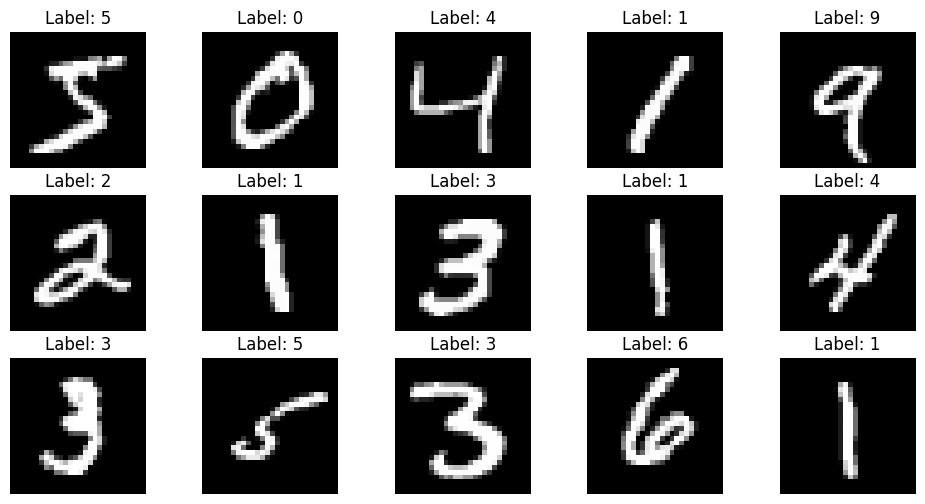

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Pisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target.astype(int)

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

no 3

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi nilai piksel ke rentang 0 hingga 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Sekarang, X_train adalah matriks fitur dengan setiap baris adalah vektor fitur dari satu citra

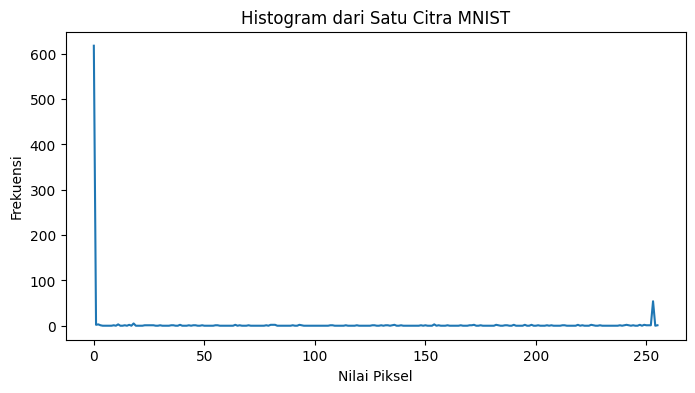

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Ambil salah satu citra sebagai contoh
sample_image = X.iloc[0].values.reshape(28, 28)  # Ambil citra pertama

# Fungsi untuk menghitung histogram citra
def compute_histogram(image):
    # Hitung histogram citra dengan 256 bin (untuk gambar grayscale)
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    return hist

# Hitung histogram dari citra contoh
sample_histogram = compute_histogram(sample_image)

# Tampilkan histogram dari citra contoh
plt.figure(figsize=(8, 4))
plt.plot(sample_histogram)
plt.title("Histogram dari Satu Citra MNIST")
plt.xlabel("Nilai Piksel")
plt.ylabel("Frekuensi")
plt.show()

no 4

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Bagi dataset menjadi data latih dan data uji dengan rasio yang berbeda
# 70:30
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)
# Tampilkan ukuran setiap bagian data
print("Rasio 70:30")
print("Data Training:", X_train_1.shape, y_train_1.shape)
print("Data Testing:", X_test_1.shape, y_test_1.shape)
print("")

Rasio 70:30
Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)



In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Bagi dataset menjadi data latih dan data uji dengan rasio yang berbeda
# 70:30
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
# Tampilkan ukuran setiap bagian data
print("Rasio 80:20")
print("Data Training:", X_train_2.shape, y_train_2.shape)
print("Data Testing:", X_test_2.shape, y_test_2.shape)
print("")

Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)



In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Bagi dataset menjadi data latih dan data uji dengan rasio yang berbeda
# 70:30
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)
# Tampilkan ukuran setiap bagian data
print("Rasio 80:20")
print("Data Training:", X_train_3.shape, y_train_3.shape)
print("Data Testing:", X_test_3.shape, y_test_3.shape)
print("")

Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)



no 5

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**NAIVE BAYES**

In [ ]:
# Klasifikasi dengan Naive Bayes (70 : 30)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_1, y_train_1)
y_pred_nb = naive_bayes.predict(X_test_1)
accuracy_nb = accuracy_score(y_test_1, y_pred_nb)
print("Akurasi Naive Bayes:",accuracy_nb)

Akurasi Naive Bayes: 0.550952380952381


In [ ]:
# Klasifikasi dengan Naive Bayes (80 : 20)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_2, y_train_2)
y_pred_nb = naive_bayes.predict(X_test_2)
accuracy_nb = accuracy_score(y_test_2, y_pred_nb)
print("Akurasi Naive Bayes:",accuracy_nb)

Akurasi Naive Bayes: 0.5515714285714286


In [ ]:
# Klasifikasi dengan Naive Bayes (90 : 10)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_3, y_train_3)
y_pred_nb = naive_bayes.predict(X_test_3)
accuracy_nb = accuracy_score(y_test_3, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

Akurasi Naive Bayes: 0.5515714285714286


**SVM**

In [ ]:
# Untuk data (70 : 30)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_1, y_train_1)

y_pred = svm_classifier.predict(X_test_1)
accuracy = accuracy_score(y_test_1, y_pred)
report = classification_report(y_test_1, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.92


In [ ]:
# Untuk data (80 : 20)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_2, y_train_2)

y_pred = svm_classifier.predict(X_test_2)
accuracy = accuracy_score(y_test_2, y_pred)
report = classification_report(y_test_2, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9210714285714285


In [ ]:
# Untuk data (90 : 10)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_3, y_train_3)

y_pred = svm_classifier.predict(X_test_3)
accuracy = accuracy_score(y_test_3, y_pred)
report = classification_report(y_test_3, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9210714285714285


no 6

In [ ]:
# Untuk Data (70 : 30)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Evaluasi model Naive Bayes pada data training
y_train_pred_nb = naive_bayes.predict(X_train_1)
accuracy_train_nb = accuracy_score(y_train_1, y_train_pred_nb)
print("Akurasi Naive Bayes pada Data Training:", accuracy_train_nb)
print("Classification Report Naive Bayes pada Data Training:\n", classification_report(y_train_1, y_train_pred_nb))
print("Confusion Matrix Naive Bayes pada Data Training:\n", confusion_matrix(y_train_1, y_train_pred_nb))

# Evaluasi model Naive Bayes pada data testing
accuracy_test_nb = accuracy_score(y_test_1, y_pred)
print("\nAkurasi Naive Bayes pada Data Testing:", accuracy_test_nb)
print("Classification Report Naive Bayes pada Data Testing:\n", classification_report(y_test_1, y_pred))
print("Confusion Matrix Naive Bayes pada Data Testing:\n", confusion_matrix(y_test_1, y_pred))

# Evaluasi model SVM (Linear Kernel) pada data training
y_train_pred = svm_classifier.predict(X_train_1)
accuracy_train_classifier = accuracy_score(y_train_1, y_train_pred)
print("\nAkurasi SVM (Linear Kernel) pada Data Training:", accuracy_train_classifier)
print("Classification Report SVM (Linear Kernel) pada Data Training:\n", classification_report(y_train_1, y_train_pred))
print("Confusion Matrix SVM (Linear Kernel) pada Data Training:\n", confusion_matrix(y_train_1, y_train_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Akurasi Naive Bayes pada Data Training: 0.11136734693877551
Classification Report Naive Bayes pada Data Training:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      4845
           1       0.86      0.00      0.00      5513
           2       0.24      0.02      0.04      4857
           3       0.17      0.02      0.03      4965
           4       0.11      1.00      0.19      4888
           5       0.09      0.04      0.05      4398
           6       1.00      0.01      0.02      4788
           7       1.00      0.03      0.05      5045
           8       0.75      0.00      0.00      4833
           9       0.11      0.01      0.01      4868

    accuracy                           0.11     49000
   macro avg       0.53      0.11      0.04     49000
weighted avg       0.54      0.11      0.04     49000

Confusion Matrix Naive Bayes pada Data Training:
 [[   3    0    1    0 4630  211    0    0    0    0]
 [   0    6    3    8 5

In [ ]:
# Untuk Data (80 : 10)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Evaluasi model Naive Bayes pada data training
y_train_pred_nb = naive_bayes.predict(X_train_2)
accuracy_train_nb = accuracy_score(y_train_2, y_train_pred_nb)
print("Akurasi Naive Bayes pada Data Training:", accuracy_train_nb)
print("Classification Report Naive Bayes pada Data Training:\n", classification_report(y_train_2, y_train_pred_nb))
print("Confusion Matrix Naive Bayes pada Data Training:\n", confusion_matrix(y_train_2, y_train_pred_nb))

# Evaluasi model Naive Bayes pada data testing
accuracy_test_nb = accuracy_score(y_test_2, y_pred)
print("\nAkurasi Naive Bayes pada Data Testing:", accuracy_test_nb)
print("Classification Report Naive Bayes pada Data Testing:\n", classification_report(y_test_2, y_pred))
print("Confusion Matrix Naive Bayes pada Data Testing:\n", confusion_matrix(y_test_2, y_pred))

# Evaluasi model SVM (Linear Kernel) pada data training
y_train_pred = svm_classifier.predict(X_train_2)
accuracy_train_classifier = accuracy_score(y_train_2, y_train_pred)
print("\nAkurasi SVM (Linear Kernel) pada Data Training:", accuracy_train_classifier)
print("Classification Report SVM (Linear Kernel) pada Data Training:\n", classification_report(y_train_2, y_train_pred))
print("Confusion Matrix SVM (Linear Kernel) pada Data Training:\n", confusion_matrix(y_train_2, y_train_pred))


Akurasi Naive Bayes pada Data Training: 0.5523571428571429
Classification Report Naive Bayes pada Data Training:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80      5560
           1       0.80      0.94      0.87      6277
           2       0.87      0.30      0.45      5610
           3       0.76      0.34      0.47      5708
           4       0.84      0.13      0.22      5529
           5       0.59      0.04      0.07      5040
           6       0.62      0.95      0.75      5480
           7       0.91      0.29      0.44      5790
           8       0.29      0.60      0.39      5468
           9       0.37      0.95      0.53      5538

    accuracy                           0.55     56000
   macro avg       0.68      0.55      0.50     56000
weighted avg       0.68      0.55      0.51     56000

Confusion Matrix Naive Bayes pada Data Training:
 [[5079    8   29   18    6   12  167    2  136  103]
 [   2 5906   15   25   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



Akurasi SVM (Linear Kernel) pada Data Training: 0.8434464285714286
Classification Report SVM (Linear Kernel) pada Data Training:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      5560
           1       0.98      0.82      0.89      6277
           2       0.95      0.80      0.87      5610
           3       0.77      0.94      0.85      5708
           4       0.86      0.95      0.90      5529
           5       0.98      0.32      0.48      5040
           6       0.94      0.95      0.94      5480
           7       0.98      0.80      0.88      5790
           8       0.57      0.98      0.72      5468
           9       0.89      0.84      0.86      5538

    accuracy                           0.84     56000
   macro avg       0.88      0.84      0.83     56000
weighted avg       0.88      0.84      0.84     56000

Confusion Matrix SVM (Linear Kernel) pada Data Training:
 [[5533    0    2    6    3    1    3    0   11    1]

In [ ]:
#Untuk data (90 : 10)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Evaluasi model Naive Bayes pada data training
y_train_pred_nb = naive_bayes.predict(X_train_3)
accuracy_train_nb = accuracy_score(y_train_3, y_train_pred_nb)
print("Akurasi Naive Bayes pada Data Training:", accuracy_train_nb)
print("Classification Report Naive Bayes pada Data Training:\n", classification_report(y_train_3, y_train_pred_nb))
print("Confusion Matrix Naive Bayes pada Data Training:\n", confusion_matrix(y_train_3, y_train_pred_nb))

# Evaluasi model Naive Bayes pada data testing
accuracy_test_nb = accuracy_score(y_test_3, y_pred)
print("\nAkurasi Naive Bayes pada Data Testing:", accuracy_test_nb)
print("Classification Report Naive Bayes pada Data Testing:\n", classification_report(y_test_3, y_pred))
print("Confusion Matrix Naive Bayes pada Data Testing:\n", confusion_matrix(y_test_3, y_pred))

# Evaluasi model SVM (Linear Kernel) pada data training
y_train_pred = svm_classifier.predict(X_train_3)
accuracy_train_classifier = accuracy_score(y_train_3, y_train_pred)
print("\nAkurasi SVM (Linear Kernel) pada Data Training:", accuracy_train_classifier)
print("Classification Report SVM (Linear Kernel) pada Data Training:\n", classification_report(y_train_3, y_train_pred))
print("Confusion Matrix SVM (Linear Kernel) pada Data Training:\n", confusion_matrix(y_train_3, y_train_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Akurasi Naive Bayes pada Data Training: 0.11010714285714286
Classification Report Naive Bayes pada Data Training:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      5560
           1       0.86      0.00      0.00      6277
           2       0.25      0.02      0.03      5610
           3       0.15      0.02      0.03      5708
           4       0.11      1.00      0.19      5529
           5       0.09      0.04      0.05      5040
           6       1.00      0.01      0.02      5480
           7       1.00      0.03      0.05      5790
           8       0.67      0.00      0.00      5468
           9       0.11      0.01      0.01      5538

    accuracy                           0.11     56000
   macro avg       0.52      0.11      0.04     56000
weighted avg       0.53      0.11      0.04     56000

Confusion Matrix Naive Bayes pada Data Training:
 [[   3    0    1    1 5314  241    0    0    0    0]
 [   0    6    5    7 6

no 7

In [ ]:
# Klasifikasi dengan Naive Bayes (70 : 30)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_1, y_train_1)
y_pred_nb = naive_bayes.predict(X_test_1)
accuracy_nb = accuracy_score(y_test_1, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

Akurasi Naive Bayes: 0.5264285714285715


In [ ]:
# Klasifikasi dengan Naive Bayes (80 : 20)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_2, y_train_2)
y_pred_nb = naive_bayes.predict(X_test_2)
accuracy_nb = accuracy_score(y_test_2, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)

Akurasi Naive Bayes: 0.5515714285714286


In [ ]:
# Klasifikasi dengan Naive Bayes (90 : 10)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_3, y_train_3)
y_pred_nb = naive_bayes.predict(X_test_3)
accuracy_nb = accuracy_score(y_test_3, y_pred_nb)
print("Akurasi Naive Bayes:",accuracy_nb)

Akurasi Naive Bayes: 0.5515714285714286


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Unduh dataset MNIST

# Bagi dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Klasifikasi menggunakan SVM sebagai contoh
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Tampilkan 15 citra data testing berserta hasil pelabelannya
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray)
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred_svm[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
